In [121]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from math import *
#%matplolib auto

## A. Modulation 

*Fabriquer le signal à transmettre 𝑥(𝑡) décrit dans l’annexe ; afficher le signal et son spectre ; quelle est (approximativement) la fréquence maximale 𝐵 ?*


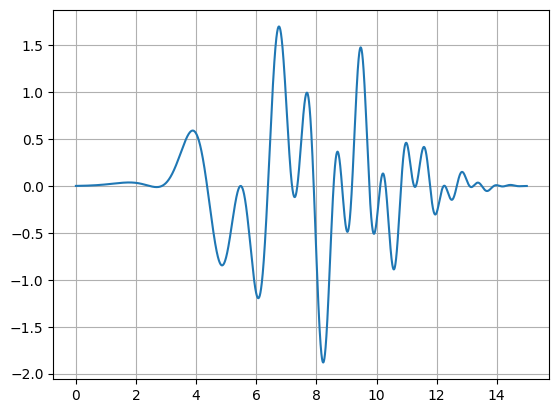

In [122]:
fc = 47.0 #carrier frequency
finfty = fc*1e2 #very high "continuous" frequency

T = 15 #duration of signal
N = round(finfty*T) #number of samples
t = np.arange(0.0, N)/finfty

pulsation1 = 2*np.pi*t/T
pulsation2 = 2*np.pi/np.sqrt(7)*t/T
xRaw = np.cos(pulsation1*t) + np.sin(pulsation2*t)
window = sig.windows.kaiser(N, 9)
x = xRaw*window

fig, ax = plt.subplots()
ax.plot(t, x)
ax.grid()

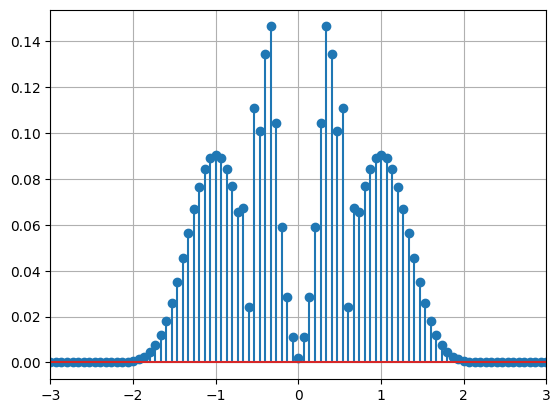

In [123]:
fs = 1/T

X = np.fft.fft(x)
freqs_centered = np.fft.fftfreq(N, 1/finfty)

N = len(x)
freqs = fs*np.arange(N)/N

fig, ax = plt.subplots()
ax.stem(freqs_centered, abs(X)/N)
plt.xlim(-3, 3)
ax.grid()

$B = 2 Hz$ 

Donc c'est bien un signal à bande limité.
Si on veut échantilloner, il faut prendre comme fréquence d'échantillonage au moins 4 Hz.

*Fabriquer le signal modulé $𝑥_𝑚 (𝑡) := 𝑥(𝑡) cos(2𝜋 𝑓𝑐𝑡)$,
avec $𝑓𝑐 := 47 Hz$ ; afficher le signal et son spectre. Pourquoi le nom “DSB-SC” donné à ce type de modulation ?*

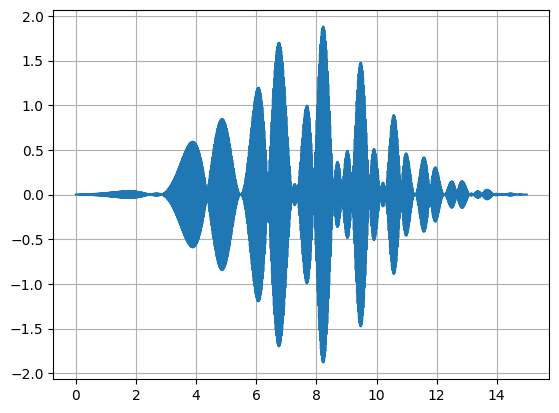

In [124]:
#Fabrication du signal modulé
fc = 47.0 
xm = x*np.cos(2*np.pi*fc*t)

fig, ax = plt.subplots()
ax.plot(t, xm)
ax.grid()

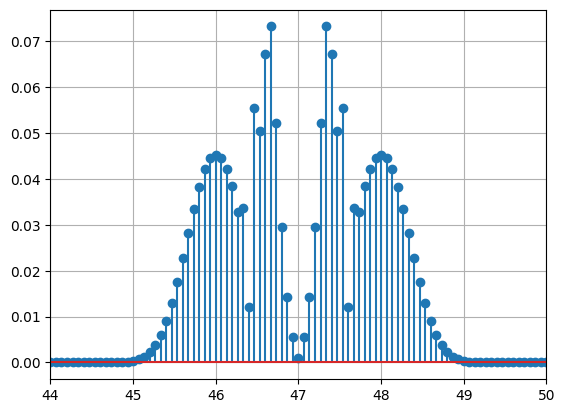

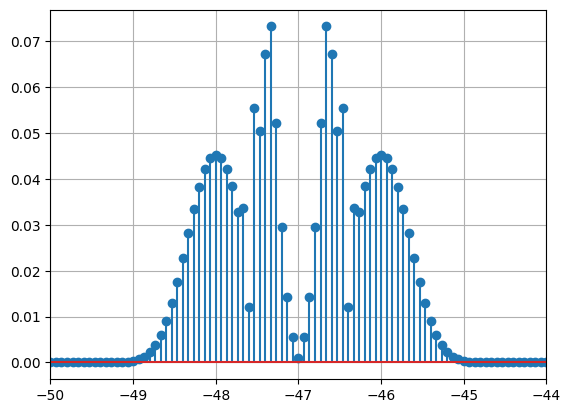

In [125]:
fs = 1/T

Xm = np.fft.fft(xm)
freqs_centered = np.fft.fftfreq(N, 1/finfty)

N = len(Xm)
freqs = fs*np.arange(N)/N

fig, ax = plt.subplots()
ax.stem(freqs_centered, abs(Xm)/N)
plt.xlim(44, 50)
ax.grid()

fig, ax = plt.subplots()
ax.stem(freqs_centered, abs(Xm)/N)
plt.xlim(-50, -44)
ax.grid()

$Remarque:$

On remarque que l'amplitude du signal modulé correspond à nos attentes : elle est égale à la moitié de celle du signal original.

*Pourquoi le nom “DSB-SC” donné à ce type de modulation ?*

Suppressed-Carrier :
On ne voit pas apparaître de pic de fréquence associé à la porteuse dans le spectre fréquenciel en $f = 47 Hz$ .

Double-Sideband : 
On retrouve la symétrie de la FFT par rapport à la droite correspondant à la fréquence de la porteuse, ce qui correspond à la modulation double-bande.

## B. Démodulation synchrone “analogique”

*Fabriquer le signal $𝑥_{𝑚𝑑} (𝑡) := 2 𝑥_𝑚 (𝑡) cos(2𝜋 𝑓_𝑐𝑡)$ ; afficher le signal et son spectre*

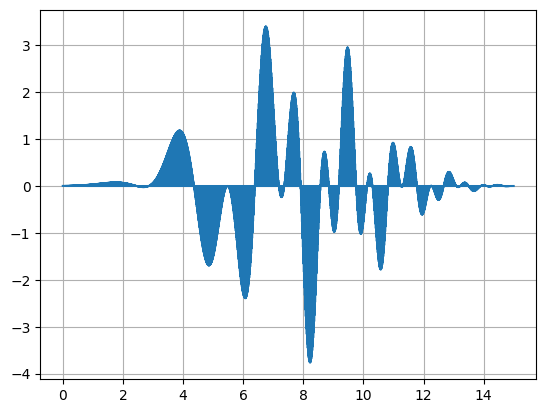

In [126]:
#B. Démodulation synchrone "analogique"

xmd = 2*xm*np.cos(2*np.pi*fc*t)

fig, ax = plt.subplots()
ax.plot(t, xmd)
ax.grid()

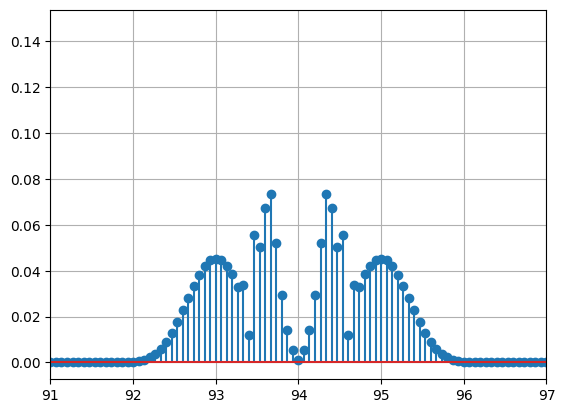

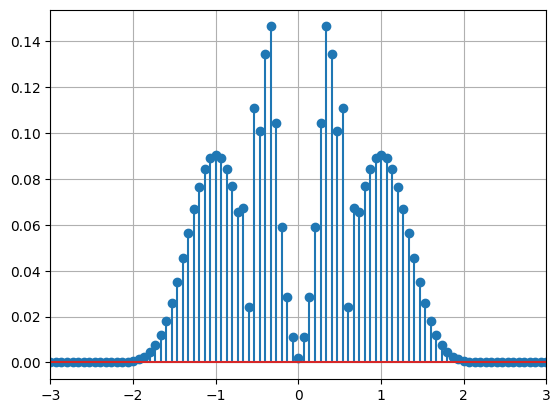

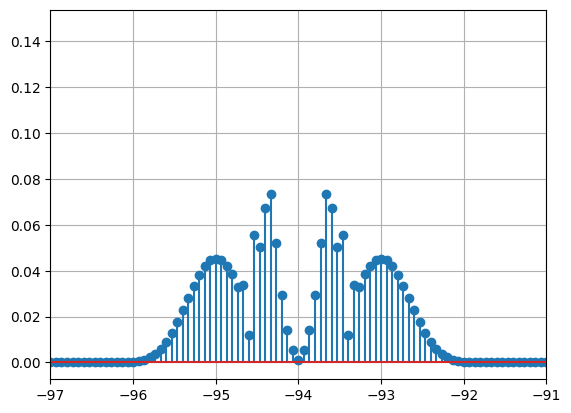

In [127]:
fs = 1/T

Xmd = np.fft.fft(xmd)
freqs_centered = np.fft.fftfreq(N, 1/finfty)

N = len(Xmd)
freqs = fs*np.arange(N)/N

fig, ax = plt.subplots()
ax.stem(freqs_centered, abs(Xmd)/N)
plt.xlim(91, 97)
ax.grid()


fig, ax = plt.subplots()
ax.stem(freqs_centered, abs(Xmd)/N)
plt.xlim(-3, 3)
ax.grid()


fig, ax = plt.subplots()
ax.stem(freqs_centered, abs(Xmd)/N)
plt.xlim(-97, -91)
ax.grid()

*Filtrer $𝑥_{𝑚𝑑}$ (𝑡) par un filtre passe-bas, soit $𝑥_{𝑚𝑑 𝑓}$ (𝑡) le
résultat ; afficher le signal et son spectre, et la réponse
fréquentielle du filtre. Conclusion ?*

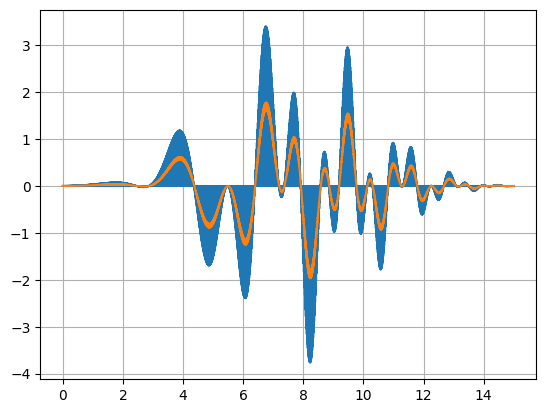

In [128]:
#on filtre xmd avec un filtre passe-bas -> XMDF résultat : afficher signal et spectre et réponse fréquentielle filtre

W_low = 20  ##fréquence de coupure du filtre
b_low, a_low = sig.butter(2, W_low, btype = 'low', fs = finfty)

xmdf= sig.lfilter(b_low, a_low, xmd - xmd[0]) + xmd[0]

fig, ax = plt.subplots()
ax.plot(t, xmd)
ax.plot(t, xmdf)
ax.grid()

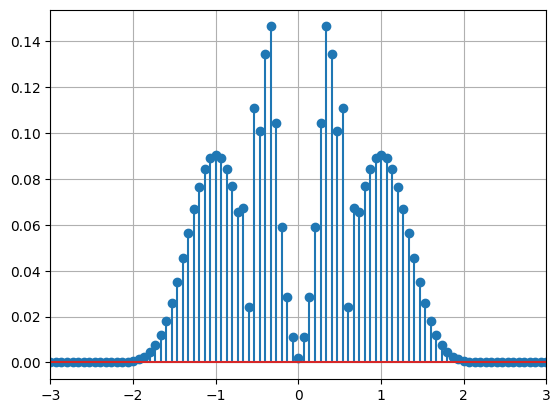

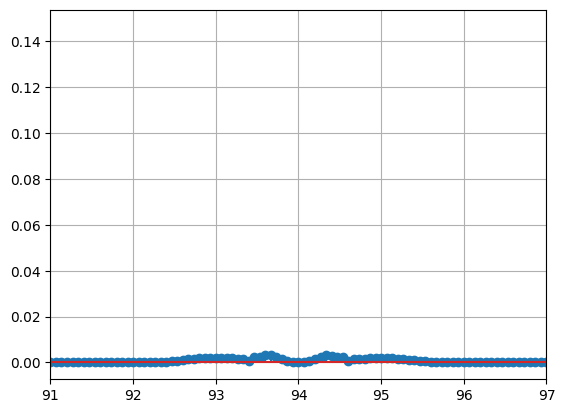

In [129]:
##spectre du signal filtré
#fs = 1/T

fs = 1/T

Xmdf = np.fft.fft(xmdf)
freqs_centered = np.fft.fftfreq(N, 1/finfty)

N = len(Xmdf)
freqs = fs*np.arange(N)/N

fig, ax = plt.subplots()
ax.stem(freqs_centered, abs(Xmdf)/N)
plt.xlim(-3, 3)
ax.grid()

fig, ax = plt.subplots()
ax.stem(freqs_centered, abs(Xmdf)/N)
plt.xlim(91, 97)
ax.grid()


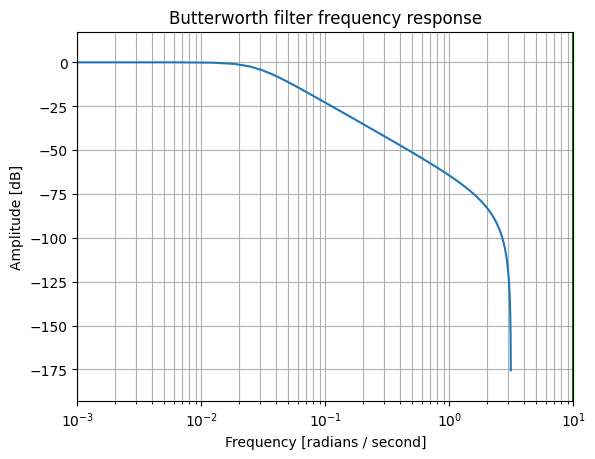

In [130]:
# Compute the frequency response
w, h = sig.freqz(b_low, a_low)       

plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(10, color='green') # cutoff frequency
plt.axvline(10**(-3), color='red') # cutoff frequency

plt.show()

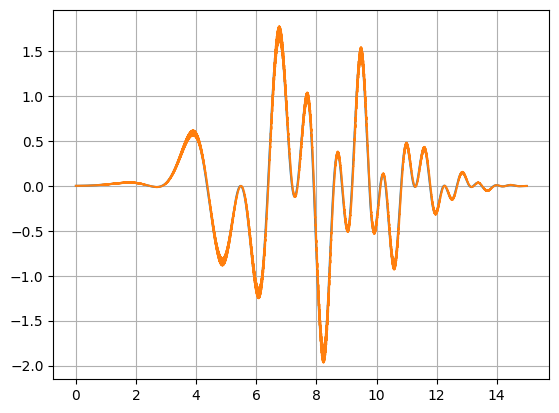

In [131]:
fig, ax = plt.subplots()
ax.plot(t, x)
ax.plot(t, xmdf)
ax.grid()

On obtient bien un signal qui ressemble au signal initial. 

*Pour la suite du traitement, on échantillonnerait $𝑥_{𝑚𝑑𝑓}$ (𝑡)
afin de manipuler numériquement le signal. Quelle est
la fréquence minimale d’échantillonnage possible ?*

La condition de Nyquist-Shannon donne : $f_e > 2f_{max}$.

Et $f_{max} = 2 Hz$

La fréquence minimale d'échantillonage possible est donc : $f_e = 4 Hz$

*La démodulation présentée ici se fait d’habitude avec
des composants analogiques. Serait-il possible de réaliser numériquement le même traitement après avoir
échantillonné $𝑥_𝑚$ ? Quelle est la fréquence minimale
d’échantillonnage possible ?*


Il est possible de réaliser un filtre numérique en réécrivant l'équation différentielle issue du filtrage analogique comme une relation de récurrence. Il est alors possible de la traiter numériquement.

On doit alors avoir : $f_e > 2f_c$ où $f_c$ est la fréquence de coupure du filtre passe-bas.
D'où : $f_{emin} = 2 f_c = 6 Hz$

## C. Démodulation synchrone par sous-échantillonnage

*Echantillonner le signal modulé $𝑥_𝑚$(𝑡) à la fréquence
𝑓𝑠 := $\frac{𝑓𝑐}{𝑛}$ avec 𝑛 entier, soit $𝑥_𝑠$ (𝑡) le résultat ; afficher
le signal et son spectre. Conclusion ? Quelle est la
fréquence minimale d’échantillonnage possible ?*

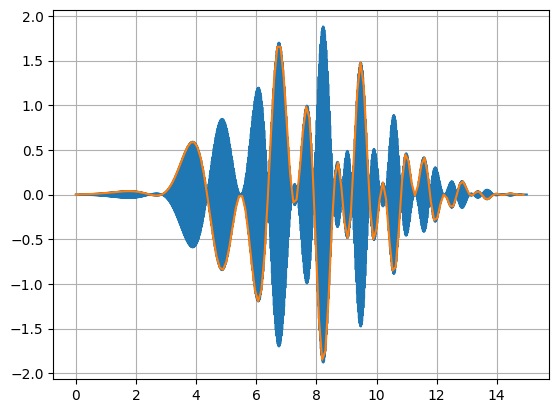

In [132]:
# Fréquence d'échantillonnage
n = 5  # Facteur de sous - échantillonnage
fs = fc/n  # Remplacez par la fréquence d'échantillonnage souhaitée

dt = int(finfty/fs) #pas de temps  d'échantillonnage

# Séquence de temps échantillonnée
te = [t[i*dt] for i in range(int(len(t)/dt))]

# Échantillonnage du signal xm
xe = [xm[i*dt] for i in range(int(len(t)/dt))]

# Affichage du signal échantillonné
fig, ax = plt.subplots()
ax.plot(t, xm)
ax.plot(te, xe)
ax.grid()


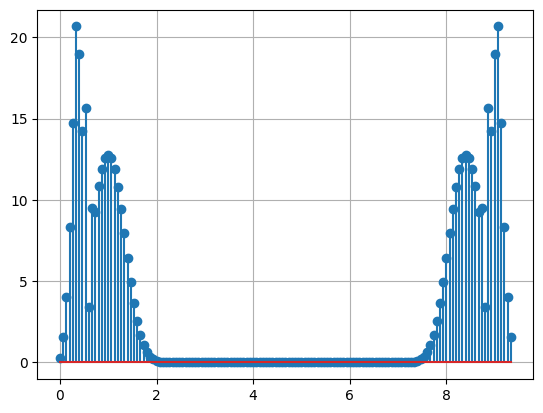

In [133]:
Xe = np.fft.fft(xe)

N = len(xe)
freqs = fs*np.arange(N)/N

fig, ax = plt.subplots()
ax.stem(freqs, abs(Xe))
ax.grid()

On a : $x_m(t) = \cos{((\omega_1 - 2\pi f_c)t)} + \cos{((\omega_1 + 2\pi f_c)t)} + \sin{((\omega_2 + 2\pi f_c)t)} + \sin{((\omega_2 - 2\pi f_c)t)}$

D'où : $\omega_{max} = \omega_1 + 2\pi f_c$ 

Donc : $f_{max} = \frac{1}{T} + f_c = 47,066 Hz$ 

La condition de Nyquist-Shannon donne : $f_s > 2f_{max}$
soit $f_{s min} = 94,1 Hz $

Or, $f_s = \frac{f_c}{n}$ 

Donc, on a $f_s$ minimal pour n = 1 car n entier. 

L'échantillonage obtenu est plutôt proche du signal de départ mais il n'est pas très satisfaisant.

*Intérêt de cette procédure ? Interprétation temporelle et
fréquentielle ?*

L'intérêt de cette procédure est que l'on a pas besoin de démoduler: pour récupérer le signal de départ il suffit d'échantilloner.

#Interprétation


## II. Modulation-démodulation DSB-SC avec sinus
*Reprendre les questions de la partie I en utilisant partout
sin(2𝜋 𝑓𝑐𝑡) au lieu de cos(2𝜋 𝑓𝑐𝑡).*

On a: $x_m(t) = x(t)\sin{2\pi f_c t}$

ValueError: could not broadcast input array from shape (70500,) into shape (141,)

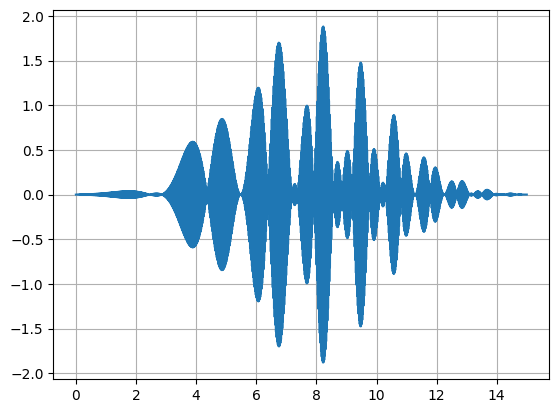

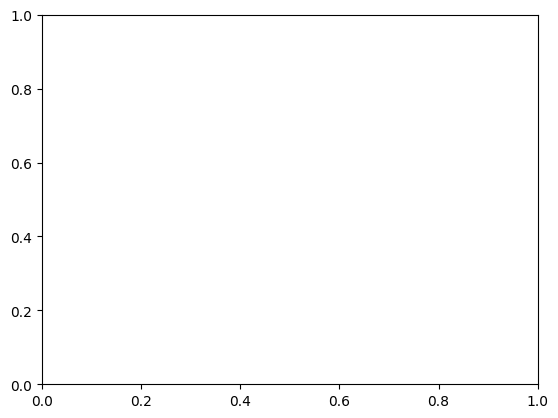

In [134]:
#Fabrication du signal modulé
fc = 47.0 
xms = x*np.sin(2*np.pi*fc*t)

fs = 1/T

Xms = np.fft.fft(xms)
freqs_centered = np.fft.fftfreq(N, 1/finfty)

N = len(xms)
freqs = fs*np.arange(N)/N


#signal temporel
fig, ax = plt.subplots()
ax.plot(t, xms)
ax.grid()

#spectre du signal
fig, ax = plt.subplots()
ax.stem(freqs_centered, abs(Xm)/N)
plt.xlim(44, 50)
ax.grid()

fig, ax = plt.subplots()
ax.stem(freqs_centered, abs(Xm)/N)
plt.xlim(-50, -44)
ax.grid()

Démodulation synchrone "analogique"

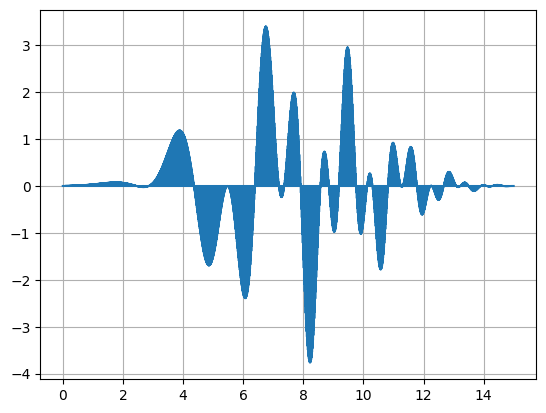

In [ ]:
#B. Démodulation synchrone "analogique"

xmsd = 2*xms*np.sin(2*np.pi*fc*t)

fig, ax = plt.subplots()
ax.plot(t, xmsd)
ax.grid()

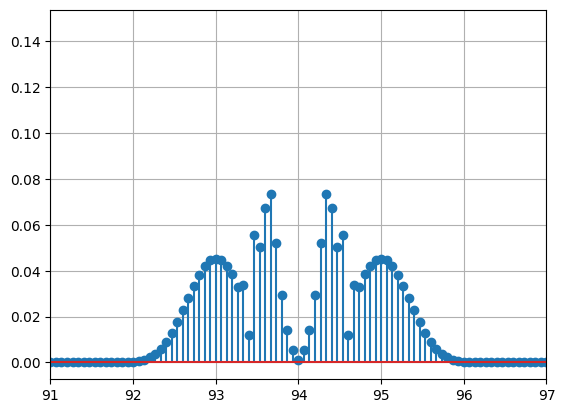

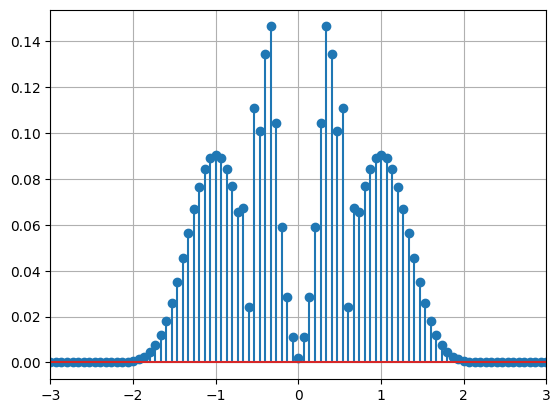

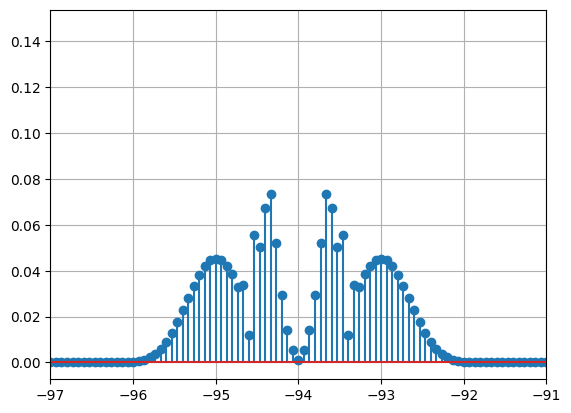

In [ ]:
fs = 1/T

Xmsd = np.fft.fft(xmsd)
freqs_centered = np.fft.fftfreq(N, 1/finfty)

N = len(Xmsd)
freqs = fs*np.arange(N)/N

fig, ax = plt.subplots()
ax.stem(freqs_centered, abs(Xmsd)/N)
plt.xlim(91, 97)
ax.grid()


fig, ax = plt.subplots()
ax.stem(freqs_centered, abs(Xmsd)/N)
plt.xlim(-3, 3)
ax.grid()


fig, ax = plt.subplots()
ax.stem(freqs_centered, abs(Xmsd)/N)
plt.xlim(-97, -91)
ax.grid()

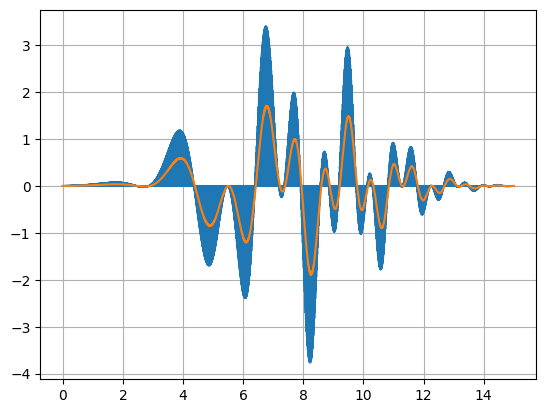

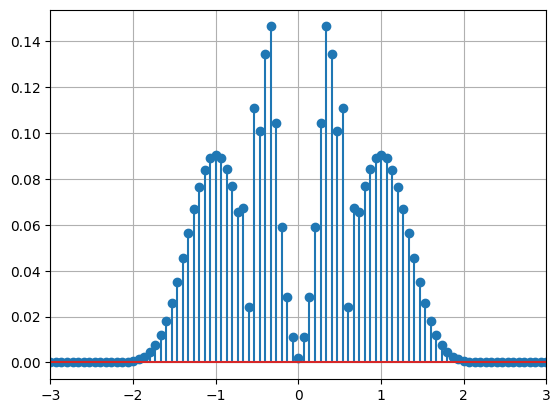

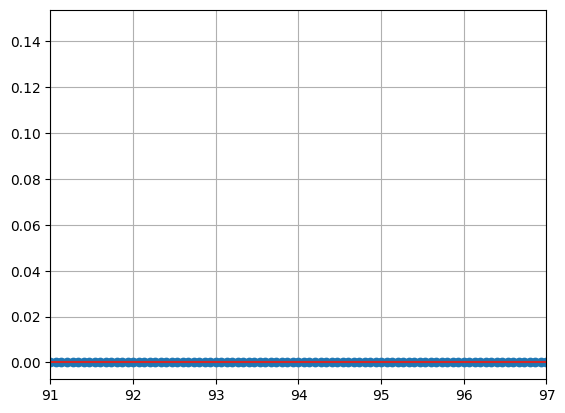

In [ ]:
#on filtre xmd avec un filtre passe-bas -> XMDF résultat : afficher signal et spectre et réponse fréquentielle filtre

W_low = 1/10000  ##fréquence de coupure du filtre
b_low, a_low = sig.butter(2, W_low, btype = 'lowpass', fs = fs)
#print(b_low)
#print(a_low)

xmsdf= sig.lfilter(b_low, a_low, xmsd - xmsd[0]) + xmsd[0]

fig, ax = plt.subplots()
ax.plot(t, xmsd)
ax.plot(t, xmsdf)
ax.grid()

##spectre du signal filtré
#fs = 1/T

fs = 1/T

Xmsdf = np.fft.fft(xmsdf)
freqs_centered = np.fft.fftfreq(N, 1/finfty)

N = len(Xmsdf)
freqs = fs*np.arange(N)/N

fig, ax = plt.subplots()
ax.stem(freqs_centered, abs(Xmsdf)/N)
plt.xlim(-3, 3)
ax.grid()

fig, ax = plt.subplots()
ax.stem(freqs_centered, abs(Xmsdf)/N)
plt.xlim(91, 97)
ax.grid()

### Démodulation synchrone par sous-échantillonnage

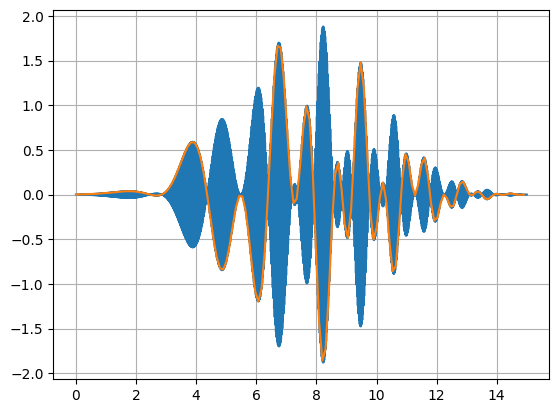

In [ ]:
# Fréquence d'échantillonnage
n = 5  # Facteur de sous - échantillonnage
fs = fc/n  # Remplacez par la fréquence d'échantillonnage souhaitée

dt = int(finfty/fs) #pas de temps  d'échantillonnage

# Séquence de temps échantillonnée
te = [t[i*dt + 25] for i in range(int(len(t)/dt))]

# Échantillonnage du signal xm
xes = [xms[i*dt + 25] for i in range(int(len(t)/dt))]

# Affichage du signal échantillonné
fig, ax = plt.subplots()
ax.plot(t, xms)
ax.plot(te, xes)
ax.grid()

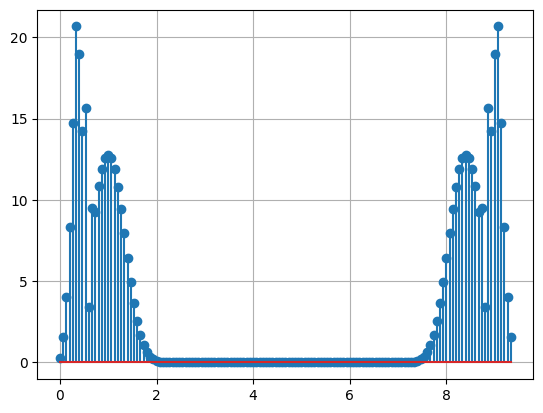

In [ ]:
Xes = np.fft.fft(xes)

N = len(xes)
freqs = fs*np.arange(N)/N

fig, ax = plt.subplots()
ax.stem(freqs, abs(Xes))
ax.grid()

La démarche est similaire à la précédente. Tout reste inchangé, modulo un déphasage à prendre en compte pour le sous-échantillonnage.

## III. Modulation et démodulation QAM (Quadrature Amplitude Modulation)
*La modulation DSB-SC “gaspille” de la bande passante ;
pourquoi ? En s’inspirant des résultats de la section précédente,
montrer qu’on peut transmettre deux signaux $𝑥_𝐼$ (𝑡) et $𝑥_𝑄$ (𝑡)
en même temps, en modulant cos(2𝜋 𝑓𝑐𝑡) par $𝑥_𝐼$ et sin(2𝜋 𝑓𝑐𝑡)
par $𝑥_𝑄$, et en sommant le résultat, d’où le signal modulé composite $𝑥_𝑚$(𝑡) := 𝑥𝐼 (𝑡) cos(2𝜋 𝑓𝑐𝑡) +$𝑥_𝑄$(𝑡) sin(2𝜋 𝑓𝑐𝑡). Reprendre
les questions des sections I-A à I-C dans ce cas.
Pour $𝑥_𝐼$ (𝑡), utiliser le signal 𝑥(𝑡) de la partie I-A ; pour
$𝑥_𝑄$(𝑡), fabriquer un signal différent, mais avec à peu près la
même fréquence maximale 𝐵.*

La modulation DSB-SC "gaspille" de la bande passante car elle utilise 2 bandes passantes et donc 2 fois plus de puissance.
En modulante 2 signaux $x_{I}(t)$ et $x_{Q}(t)$ par $\cos(2\pi f_ct)$ et $\sin(2\pi f_ct)$, on peut récupérer les 2 signaux initiaux par sous-échantillonnage comme précédemment en induisant ou non le déphasage afin de récupérer l'un ou l'autre des signaux.

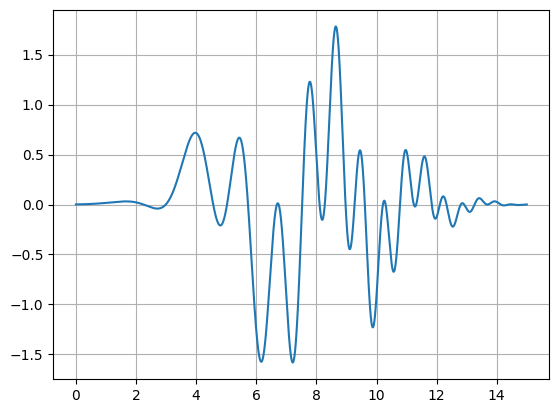

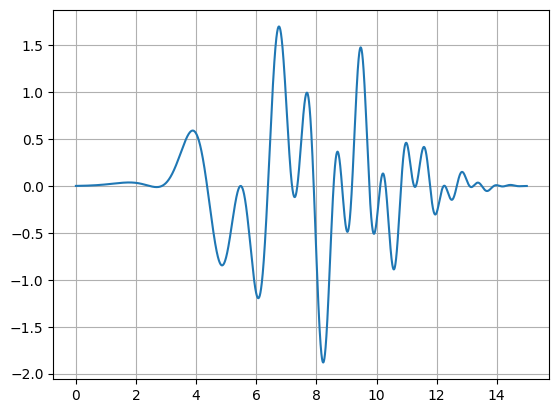

In [ ]:
#signal xI
xI = x

#signal xQ
fc = 47.0 #carrier frequency
finfty = fc*1e2 #very high "continuous" frequency

T = 15 #duration of signal
N = round(finfty*T) #number of samples
t = np.arange(0.0, N)/finfty

pulsation1q = 2*np.pi*t/T
pulsation2q = 2*np.pi/np.sqrt(15)*t/T
xRaw = np.cos(pulsation1q*t) + np.sin(pulsation2q*t)
window = sig.windows.kaiser(N, 9)
xQ = xRaw*window

fig, ax = plt.subplots()
ax.plot(t, xQ)
ax.grid()

fig, ax = plt.subplots()
ax.plot(t, x)
ax.grid()

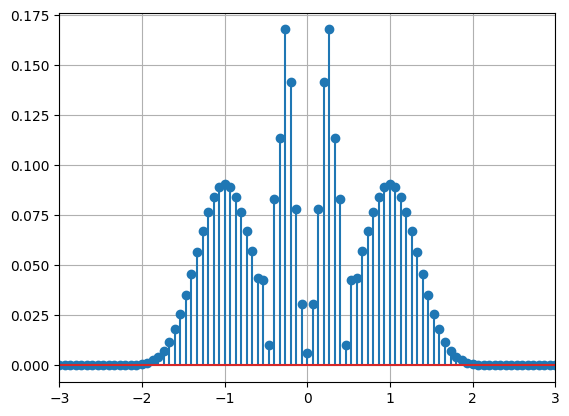

In [ ]:
## FFT du signal xQ
fs = 1/T

XQ = np.fft.fft(xQ)
freqs_centered = np.fft.fftfreq(N, 1/finfty)

N = len(xQ)
freqs = fs*np.arange(N)/N

fig, ax = plt.subplots()
ax.stem(freqs_centered, abs(XQ)/N)
plt.xlim(-3, 3)
ax.grid()

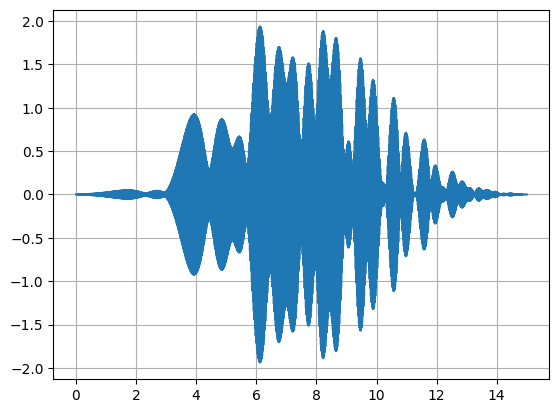

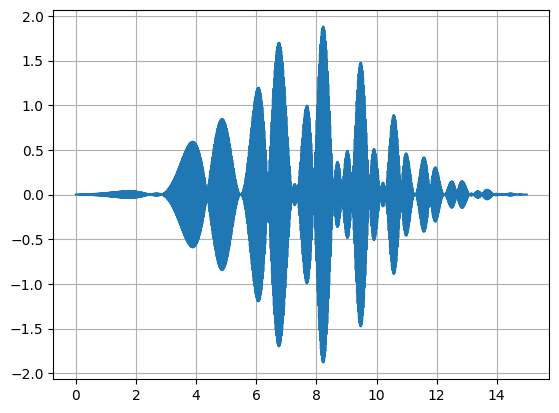

In [ ]:
## Signal modulé
fc = 47.0 
xm2 = xI*np.cos(2*np.pi*fc*t) + xQ*np.sin(2*np.pi*fc*t)

fig, ax = plt.subplots()
ax.plot(t, xm2)
ax.grid()

#Signal modulé initial (partie I)
fig, ax = plt.subplots()
ax.plot(t, xm)
ax.grid()

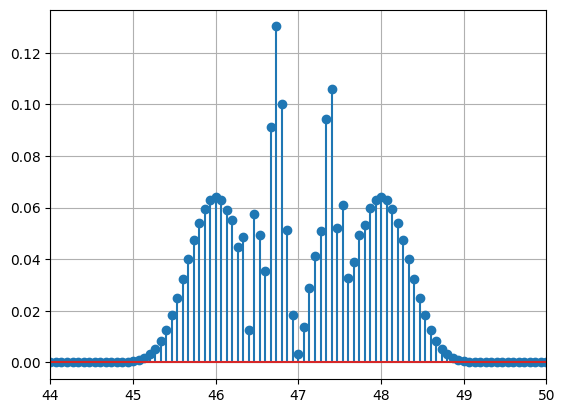

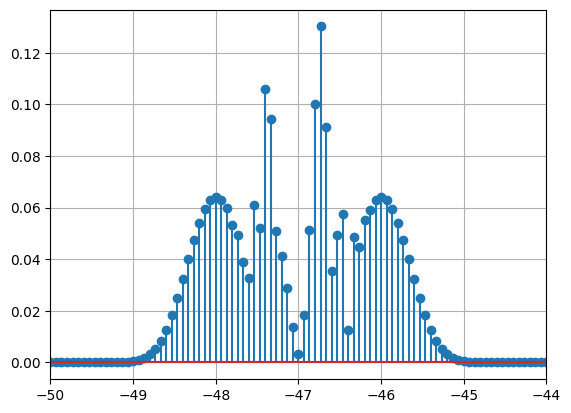

In [ ]:
## FFT du signal modulé

fs = 1/T

Xm2 = np.fft.fft(xm2)
freqs_centered = np.fft.fftfreq(N, 1/finfty)

N = len(Xm2)
freqs = fs*np.arange(N)/N

fig, ax = plt.subplots()
ax.stem(freqs_centered, abs(Xm2)/N)
plt.xlim(44, 50)
ax.grid()

fig, ax = plt.subplots()
ax.stem(freqs_centered, abs(Xm2)/N)
plt.xlim(-50, -44)
ax.grid()

Démodulation synchrone analogique de $x_I$

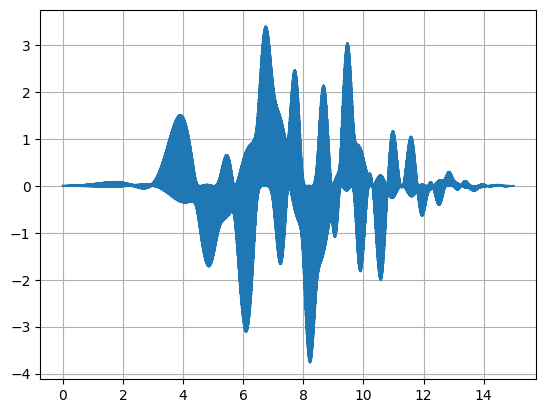

In [ ]:
## Fabrication du signal modulé pour xI

xmdI = 2*xm2*np.cos(2*np.pi*fc*t)

fig, ax = plt.subplots()
ax.plot(t, xmdI)
ax.grid()

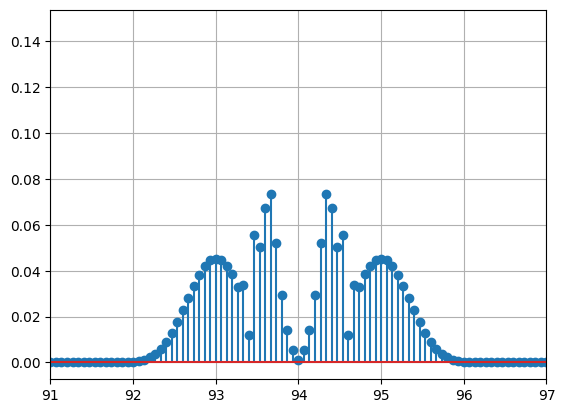

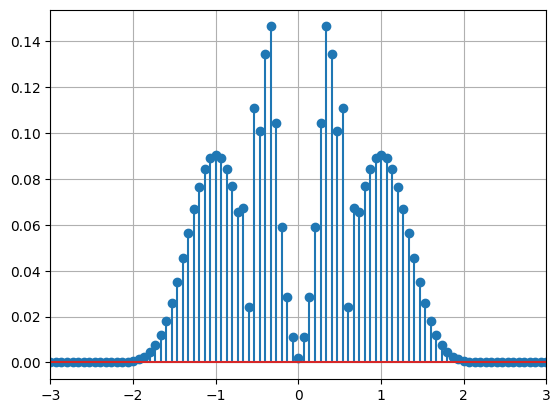

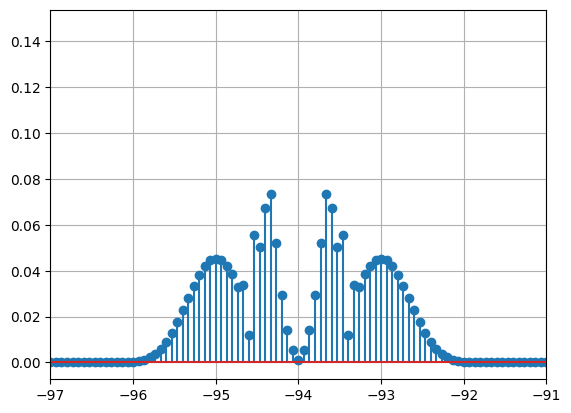

In [ ]:
fs = 1/T

XmdI = np.fft.fft(xmdI)
freqs_centered = np.fft.fftfreq(N, 1/finfty)

N = len(XmdI)
freqs = fs*np.arange(N)/N

fig, ax = plt.subplots()
ax.stem(freqs_centered, abs(XmdI)/N)
plt.xlim(91, 97)
ax.grid()


fig, ax = plt.subplots()
ax.stem(freqs_centered, abs(XmdI)/N)
plt.xlim(-3, 3)
ax.grid()


fig, ax = plt.subplots()
ax.stem(freqs_centered, abs(XmdI)/N)
plt.xlim(-97, -91)
ax.grid()

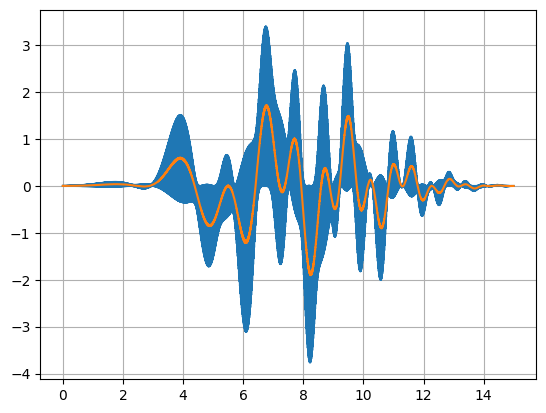

In [ ]:
# Filtrage du signal

W_low = 10  ##fréquence de coupure du filtre
b_low, a_low = sig.butter(2, W_low, btype = 'low', fs = finfty)

xmdfI= sig.lfilter(b_low, a_low, xmdI - xmdI[0]) + xmdI[0]

fig, ax = plt.subplots()
ax.plot(t, xmdI)
ax.plot(t, xmdfI)
ax.grid()

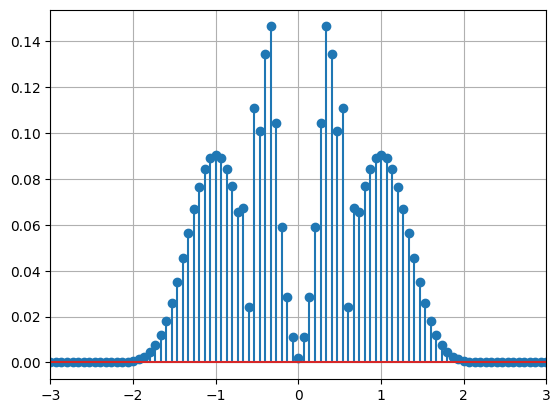

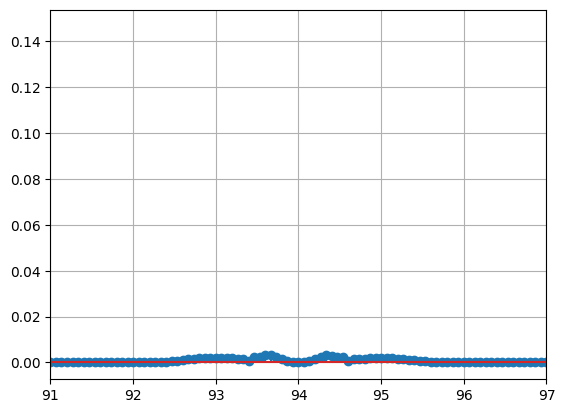

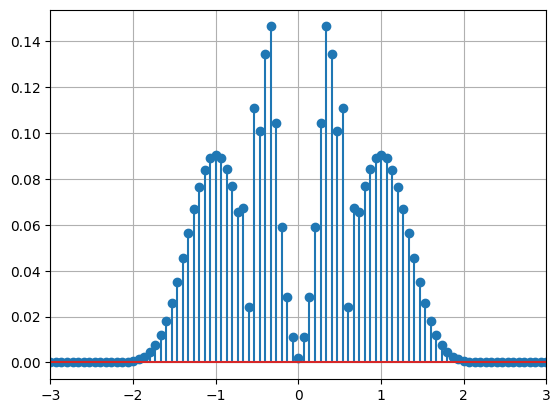

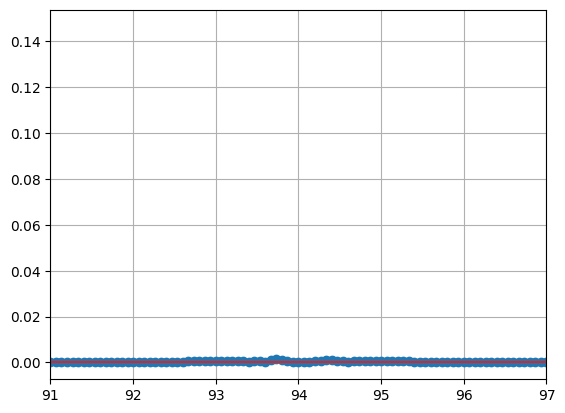

In [ ]:
##spectre du signal filtré obtenue partie I
#fs = 1/T

fs = 1/T

Xmdf = np.fft.fft(xmdf)
freqs_centered = np.fft.fftfreq(N, 1/finfty)

N = len(Xmdf)
freqs = fs*np.arange(N)/N

fig, ax = plt.subplots()
ax.stem(freqs_centered, abs(Xmdf)/N)
plt.xlim(-3, 3)
ax.grid()

fig, ax = plt.subplots()
ax.stem(freqs_centered, abs(Xmdf)/N)
plt.xlim(91, 97)
ax.grid()

##spectre du signal filtré xmd2
#fs = 1/T

fs = 1/T

XmdfI = np.fft.fft(xmdfI)
freqs_centered = np.fft.fftfreq(N, 1/finfty)

N = len(XmdfI)
freqs = fs*np.arange(N)/N

fig, ax = plt.subplots()
ax.stem(freqs_centered, abs(XmdfI)/N)
plt.xlim(-3, 3)
ax.grid()

fig, ax = plt.subplots()
ax.stem(freqs_centered, abs(XmdfI)/N)
plt.xlim(91, 97)
ax.grid()


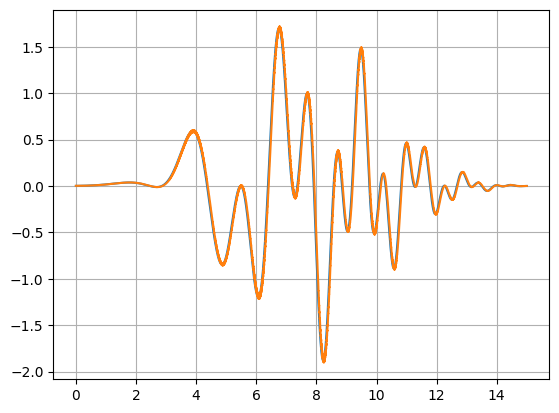

In [ ]:
#Comparaison des 2 signaux intial et filtré
fig, ax = plt.subplots()
ax.plot(t, xI)
ax.plot(t, xmdfI)
ax.grid()

On récupère bien le signal initial $x_I$

### Démodulation synchrone analogique de $x_Q$

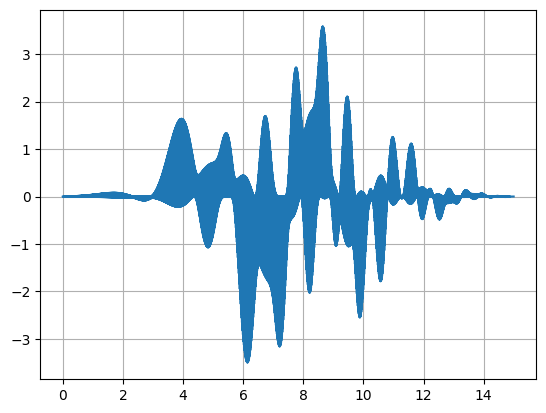

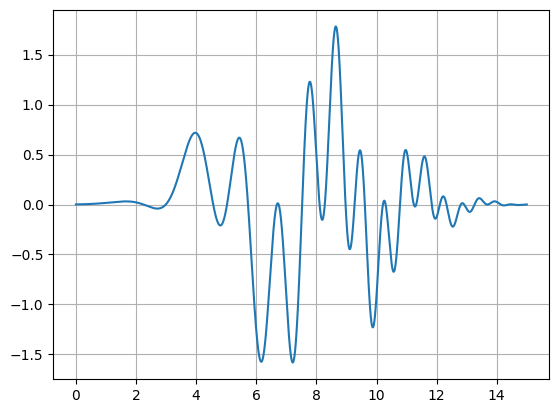

In [ ]:
#B. Démodulation synchrone "analogique"

xmdQ = 2*xm2*np.sin(2*np.pi*fc*t)

fig, ax = plt.subplots()
ax.plot(t, xmdQ)
ax.grid()

fig, ax = plt.subplots()
ax.plot(t, xQ)
ax.grid()

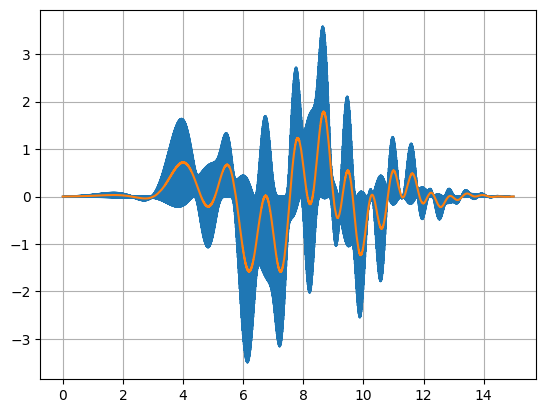

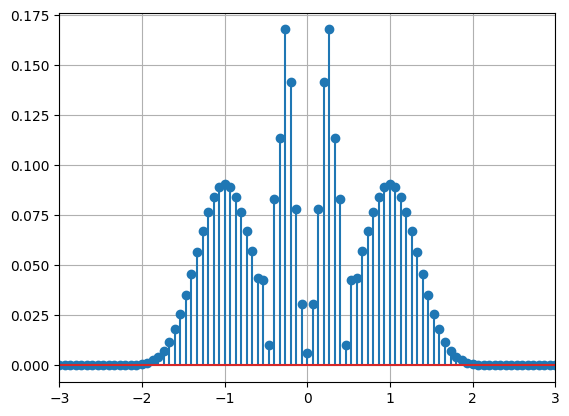

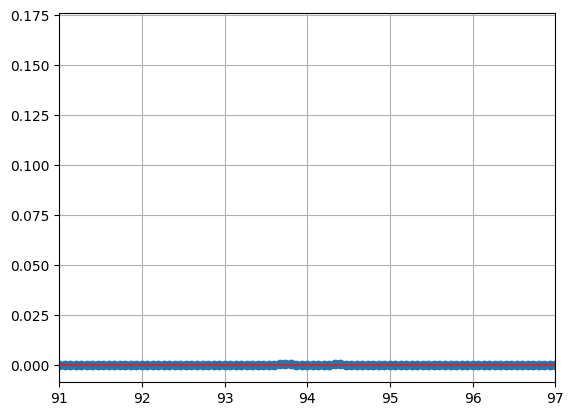

In [ ]:

W_low = 1/10000  ##fréquence de coupure du filtre
b_low, a_low = sig.butter(2, W_low, btype = 'lowpass', fs = fs)

xmdfQ= sig.lfilter(b_low, a_low, xmdQ - xmdQ[0]) + xmdQ[0]

fig, ax = plt.subplots()
ax.plot(t, xmdQ)
ax.plot(t, xmdfQ)
ax.grid()

##spectre du signal filtré
#fs = 1/T

fs = 1/T

XmdfQ = np.fft.fft(xmdfQ)
freqs_centered = np.fft.fftfreq(N, 1/finfty)

N = len(XmdfQ)
freqs = fs*np.arange(N)/N

fig, ax = plt.subplots()
ax.stem(freqs_centered, abs(XmdfQ)/N)
plt.xlim(-3, 3)
ax.grid()

fig, ax = plt.subplots()
ax.stem(freqs_centered, abs(XmdfQ)/N)
plt.xlim(91, 97)
ax.grid()

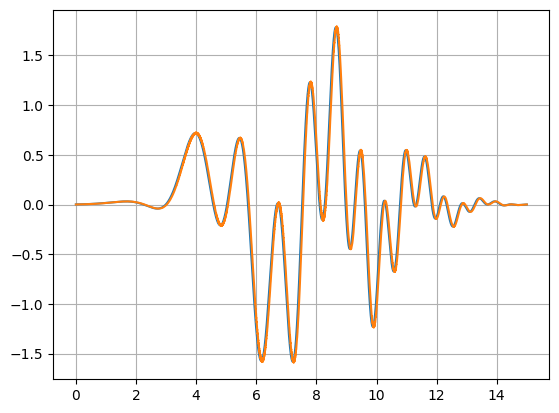

In [ ]:
# Comparaison des signaux xQ et xmdfQ
fig, ax = plt.subplots()
ax.plot(t, xQ)
ax.plot(t, xmdfQ)
ax.grid()


### Démodulation par sous-échantillonnage

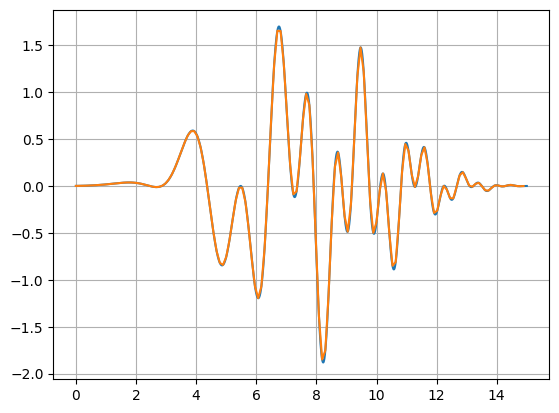

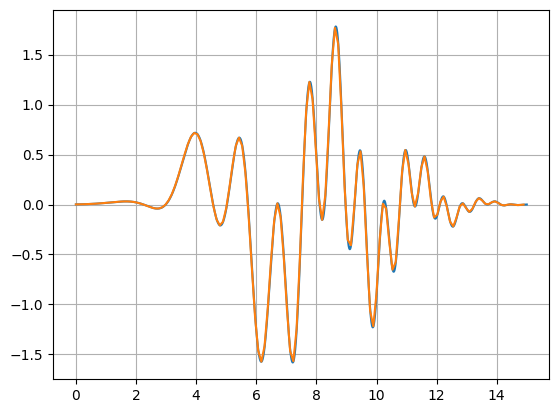

In [ ]:
# Fréquence d'échantillonnage
n = 5  # Facteur de sous - échantillonnage
fs = fc/n  # Remplacez par la fréquence d'échantillonnage souhaitée

dt = int(finfty/fs) #pas de temps  d'échantillonnage

# Séquence de temps échantillonnée
teI = [t[i*dt] for i in range(int(len(t)/dt))]
teQ = [t[i*dt + 25] for i in range(int(len(t)/dt))]

# Échantillonnage du signal xm
xeI = [xm2[i*dt] for i in range(int(len(t)/dt))]
xeQ = [xm2[i*dt + 25] for i in range(int(len(t)/dt))]

# Affichage du signal échantillonné
fig, ax = plt.subplots()
ax.plot(t, xI)
ax.plot(te, xeI)
ax.grid()

fig, ax = plt.subplots()
ax.plot(t, xQ)
ax.plot(te, xeQ)
ax.grid()

On peut donc récupérer simultanément les 2 signaux $x_I$ et $x_Q$.

## IV. Modulation et démodulation SSB-SC (Single-SideBand Supressed-Carrier)
*Si on n’a q’un seul signal 𝑥(𝑡) à transmettre, une autre
façon d’économiser la bande passante est la modulation à
bande unique “SSB-SC” ; pourquoi ? Reprendre les questions
les questions de la partie I dans ce cas (pour la modulation,
on pourra utiliser la fonction scipy.signal.hilbert).*

La modulation à bande unique "SSB-SC" (Single Sideband Suppressed Carrier) permet d'économiser de la bande passante en ne transmettant qu'une seule bande latérale (USB ou LSB) plutôt que les deux bandes latérales et la porteuse, comme c'est le cas dans la modulation d'amplitude classique (AM). 

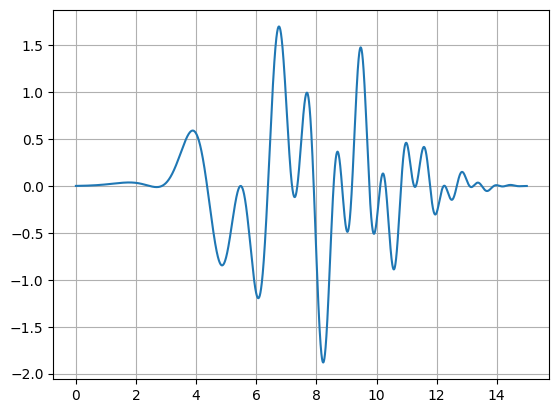

In [135]:
fig, ax = plt.subplots()
ax.plot(t, x)
ax.grid()

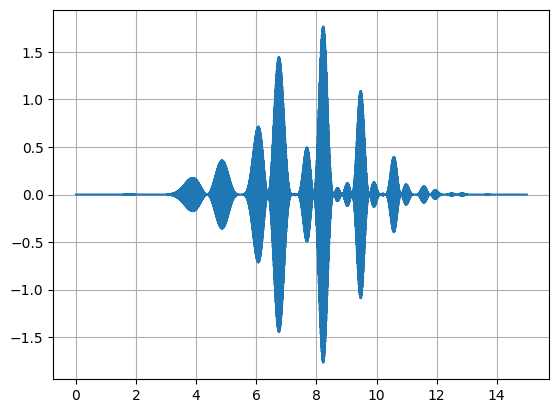

In [138]:
# Fabrication du signal modulé single sideband suppressed carrier
xmh = sig.hilbert(xm)
shifted_signal = np.imag(xmh)

xmssb = xmh*shifted_signal

fig, ax = plt.subplots()
ax.plot(t, xmssb)
ax.grid()

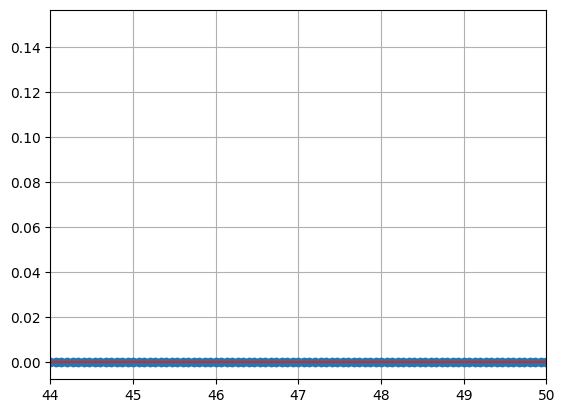

In [139]:
# Spectre du signal de hilbert
Xmssb = np.fft.fft(xmssb)
freqs_centered = np.fft.fftfreq(N, 1/finfty)

N = len(Xmssb)
freqs = fs*np.arange(N)/N

fig, ax = plt.subplots()
ax.stem(freqs_centered, abs(Xmssb)/N)
plt.xlim(44, 50)
ax.grid()
